In [1]:
import numpy as np
import sewpy
import aplpy
import astropy.units as u
import matplotlib.pyplot as plt

%matplotlib inline

/scratch/home/rwibowo/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
image_file = "image.fits"

params = ['NUMBER', 'FLUX_ISO', 'FLUXERR_ISO', 'FLUX_AUTO', 'FLUXERR_AUTO', 'FLUX_BEST', 'FLUXERR_BEST', 'BACKGROUND', 
          'THRESHOLD', 'FLUX_MAX', 'XMAX_IMAGE', 'YMAX_IMAGE', 'XPEAK_IMAGE', 'YPEAK_IMAGE', 'ALPHAPEAK_J2000', 
          'DELTAPEAK_J2000', 'X_IMAGE', 'Y_IMAGE', 'ALPHA_SKY', 'DELTA_SKY', 'ALPHA_J2000', 'DELTA_J2000']

config = {"DETECT_THRESH":3, "ANALYSIS_THRESH":2.5}

In [3]:
sew = sewpy.SEW(params=params, config=config)

out = sew(image_file)
data = out["table"]
print(data)

Ouch, SExtractor complains :
b''


NUMBER   FLUX_ISO  FLUXERR_ISO  ...  DELTA_SKY  ALPHA_J2000 DELTA_J2000
            ct          ct      ...     deg         deg         deg    
------ ----------- ------------ ... ----------- ----------- -----------
     1 0.001610435 0.0001688072 ... -50.0062024   9.9958517 -50.0062024
     2 0.004381262 0.0002781114 ... -49.9931325   9.9969105 -49.9931325
     3 0.003045082 0.0002387295 ... -49.9931615   10.009849 -49.9931615
     4 0.001268486 0.0001562851 ... -49.9935281  10.0042992 -49.9935281
     5 0.003078711 0.0002300455 ... -49.9936017   9.9945986 -49.9936017
     6 0.004901421 0.0002923827 ... -49.9948648  10.0039663 -49.9948648
     7 0.001529083 0.0001688072 ... -49.9952222   9.9928828 -49.9952222
     8 0.003010243 0.0002300455 ... -49.9952325   9.9964834 -49.9952325
     9 0.002230727 0.0002017632 ... -49.9956805   9.9962842 -49.9956805
    10 0.001308087 0.0001562851 ... -49.9956617   9.9971556 -49.9956617
   ...         ...          ... ...         ...         ...     

In [4]:
ra, dec, flux = data['ALPHA_J2000'], data['DELTA_J2000'], data['FLUX_MAX']
label = data['NUMBER'].astype('int')

In [5]:
rms = 6.70140567406e-05
multp = np.array([2.5, 3, 4, 5, 6, 7, 10, 20])
lvl = rms*multp

INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]


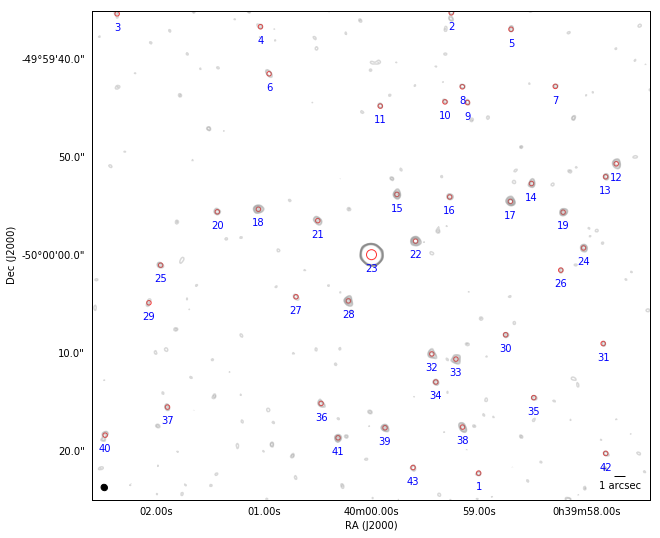

In [6]:
image = aplpy.FITSFigure(image_file)
#image.show_colorscale()#tretch='power', exponent=0.3)
#image.show_grayscale()
#image.show_colorbar()
image.show_contour(image_file, colors='gray', levels=lvl, alpha=0.3)


image.add_beam()
image.beam.set_color('black')
image.add_scalebar(1 * u.arcsecond)
image.scalebar.set_label('1 arcsec')
image.scalebar.set_color("black")

marker_size =  80 * flux/flux.max() + 20
image.show_markers(ra, dec, edgecolor='red', facecolor='none', marker='o', s=marker_size, alpha=0.8)
# primary beam circle
#image.show_circles(center_x, center_y, PB/2.0, edgecolor=['blue', 'green', 'red'])

for i, lbl in enumerate(label): 
    image.add_label(ra[i], dec[i]-0.0004, lbl, color="blue")

#image.show_colorscale()

In [7]:
res = []
for i, f in enumerate(flux):
    print(label[i], ra[i], dec[i], f)
    res.append([label[i], ra[i], dec[i], f])

1 9.9958517 -50.0062024 0.0002471109
2 9.9969105 -49.9931325 0.0002715409
3 10.009849 -49.9931615 0.0002380345
4 10.0042992 -49.9935281 0.0002201325
5 9.9945986 -49.9936017 0.0002729117
6 10.0039663 -49.9948648 0.0002678566
7 9.9928828 -49.9952222 0.0002356003
8 9.9964834 -49.9952325 0.0002692206
9 9.9962842 -49.9956805 0.0002456313
10 9.9971556 -49.9956617 0.0002284112
11 9.9996603 -49.9957809 0.0002486813
12 9.990525 -49.9974191 0.000393989
13 9.9909368 -49.997788 0.0003310017
14 9.9938053 -49.997979 0.0003808741
15 9.9990164 -49.998289 0.0004761546
16 9.9969734 -49.9983607 0.0003193696
17 9.9946226 -49.9984875 0.0005901575
18 10.0043794 -49.9987093 0.0004877348
19 9.9925799 -49.9987939 0.0004264167
20 10.0059694 -49.9987823 0.0003109034
21 10.0020802 -49.9990332 0.0003607037
22 9.9982946 -49.9996151 0.0006217384
23 10.0 -50.0 0.9994926
24 9.9917906 -49.9998082 0.0003881154
25 10.0081661 -50.0002977 0.0003063905
26 9.9926706 -50.0004387 0.0002212906
27 10.0029241 -50.0011945 0.000222

In [8]:
sources = []
with open("sources.txt", "r") as ifile:
    for line in ifile:
        if line[0] == '#':
            continue
        else:
            data = line.strip().split()
            alpha = float(data[0])
            delta = float(data[1])
            fluxmjy  = float(data[2]) #mJy
            sources.append([alpha, delta, fluxmjy/1000.])

In [9]:
dirtol = 0.3/3600.
positive = 0
negative = 0
falsepos = 0
falseneg = 0
recovered = []
maybesidelobes = []
for data in res:
    found = False
    for obj in sources:
        dist = np.sqrt((data[1]-obj[0])**2 + (data[2]-obj[1])**2)
        if dist < dirtol:
            #print(data, obj, data[-1]/obj[-1])
            ratio = data[-1]/obj[-1]
            print(data[0], ratio)
            data.extend(obj)
            data.append(ratio)
            recovered.append(data)
            positive += 1
            found = True
    
    if not found:
        maybesidelobes.append(data)
        falsepos += 1

for obj in sources:
    found = False
    for data in res:
        dist = np.sqrt((data[1]-obj[0])**2 + (data[2]-obj[1])**2)
        if dist < dirtol:
            found = True
    
    if not found:
        falseneg += 1
        
print(f"Positive detection : {positive}")
print(f"False negative (undetected source) : {falseneg}")
print(f"False positive : {falsepos}")


7 0.41794148117137
9 0.42430183086402484
11 0.40845031789909025
12 0.5374250618942716
13 0.4677960137200616
14 0.592048231351311
15 0.5671126663268271
16 2.1356372414623217
17 0.6486558820684623
18 0.555893452049205
19 0.5332241667135595
20 0.4636660686349515
21 0.5409043672293594
22 0.6365724477499162
23 0.9994926
24 0.4105134228649336
25 0.5712031245630552
28 0.5788230850997885
29 0.5261693518405255
30 0.39267152437451636
32 0.47142632522483263
33 0.6081599236944599
34 0.41968450225602605
38 0.39602196109637305
39 0.5269893180997686
40 0.5223095668139479
41 0.47963332252605956
Positive detection : 27
False negative (undetected source) : 24
False positive : 16


In [10]:
sources = np.array(sources)
ra_sim = sources[:,0]
dec_sim = sources[:,1]

INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]


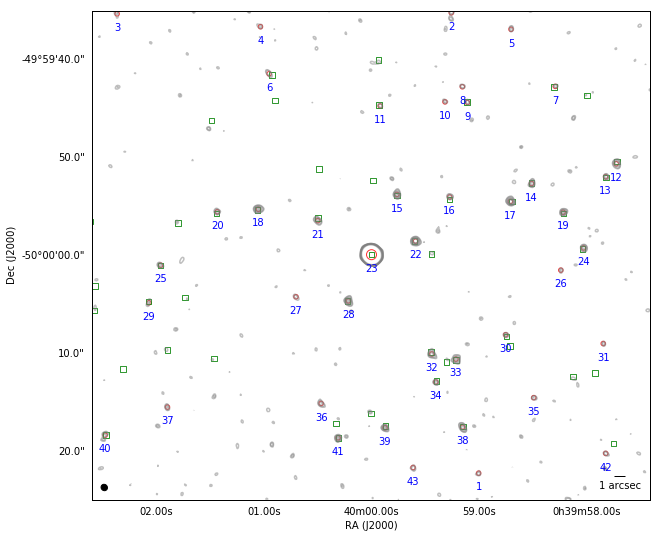

In [11]:
image = aplpy.FITSFigure(image_file)
#image.show_colorscale()#tretch='power', exponent=0.3)
#image.show_grayscale()
#image.show_colorbar()
image.show_contour(image_file, colors='gray', levels=lvl, alpha=0.5)


image.add_beam()
image.beam.set_color('black')
image.add_scalebar(1 * u.arcsecond)
image.scalebar.set_label('1 arcsec')
image.scalebar.set_color("black")

marker_size =  80 * flux/flux.max() + 20
image.show_markers(ra, dec, edgecolor='red', facecolor='none', marker='o', s=marker_size, alpha=0.8)

image.show_markers(ra_sim, dec_sim, edgecolor='green', facecolor='none', marker='s', s=30, alpha=0.8)
# primary beam circle
#image.show_circles(center_x, center_y, PB/2.0, edgecolor=['blue', 'green', 'red'])

for i, lbl in enumerate(label): 
    image.add_label(ra[i], dec[i]-0.0004, lbl, color="blue")

#image.show_colorscale()

In [12]:
recovered[0]

[7,
 9.9928828,
 -49.9952222,
 0.0002356003,
 9.992931,
 -49.995234,
 0.000563716,
 0.41794148117137]

In [13]:
maybesidelobes[0]

[1, 9.9958517, -50.0062024, 0.0002471109]

### Check PSF vs False positif

In [14]:
maybesidelobes = np.array(maybesidelobes)

ra_falsepos = maybesidelobes[:,1]
dec_falsepos = maybesidelobes[:,2]
flux_falsepos = maybesidelobes[:,3]

INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Auto-setting vmin to -4.967e-02 [aplpy.core]
INFO: Auto-setting vmax to  1.086e-01 [aplpy.core]


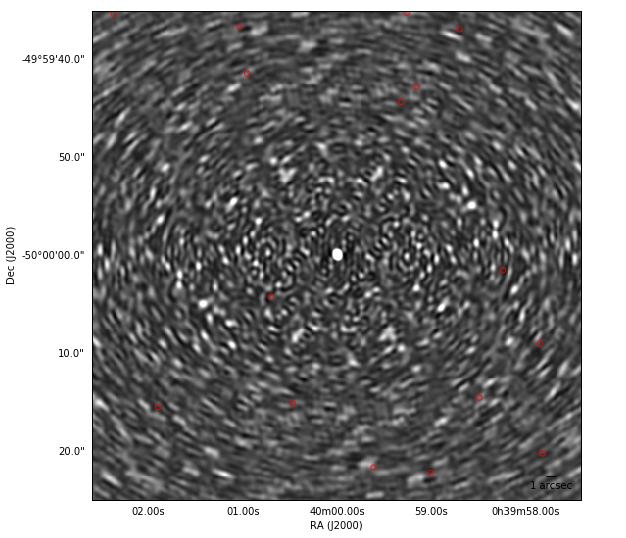

In [15]:
psf = aplpy.FITSFigure("psf.fits")
psf.show_grayscale()#stretch='power', exponent=0.3)
#image.show_colorscale()#stretch='power', exponent=0.3)
#image.show_grayscale()
#image.show_colorbar()
#image.show_contour(image_file, colors='gray', levels=lvl, alpha=0.3)



# psf.add_beam()
# psf.beam.set_color('black')
psf.add_scalebar(1 * u.arcsecond)
psf.scalebar.set_label('1 arcsec')
psf.scalebar.set_color("black")

psf.show_markers(ra_falsepos, dec_falsepos, edgecolor='red', facecolor='none', marker='o', s=30, alpha=0.8)

#psf.show_markers(ra_sim, dec_sim, edgecolor='green', facecolor='none', marker='s', s=30, alpha=0.8)

# for i, lbl in enumerate(label): 
#     psf.add_label(ra[i], dec[i]-0.0004, lbl, color="blue")

#image.show_colorscale()

In [16]:
# image = aplpy.FITSFigure(image_file)
# #image.show_colorscale()#tretch='power', exponent=0.3)
# #image.show_grayscale()
# #image.show_colorbar()
# #image.show_contour(image_file, colors='gray', levels=lvl, alpha=0.5)


# image.add_beam()
# image.beam.set_color('black')
# image.add_scalebar(1 * u.arcsecond)
# image.scalebar.set_label('1 arcsec')
# image.scalebar.set_color("black")

# marker_size =  500 * recovered[-1]
# image.show_markers(ra, dec, edgecolor='red', facecolor='none', marker='o', s=marker_size, alpha=0.8)

# #image.show_markers(ra_sim, dec_sim, edgecolor='green', facecolor='none', marker='s', s=30, alpha=0.8)
# # primary beam circle
# #image.show_circles(center_x, center_y, PB/2.0, edgecolor=['blue', 'green', 'red'])

# for i, lbl in enumerate(label): 
#     image.add_label(ra[i], dec[i]-0.0004, lbl, color="blue")

# #image.show_colorscale()